The source of data: http://jmcauley.ucsd.edu/data/amazon/ for Pet Supplies (Ratings only)

# Loading Libraries 

In [115]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Loading the data sets

In [2]:
os.chdir("/Users/sheebamoghal/Desktop/data_science /Recommender_Systems")

In [3]:
df=pd.read_csv("pets_ratings.csv")

In [4]:
df.head(4)

,A3PG0KS1YE8MR4,0615553605,5.0,1354838400
0,A363P047LR5XI6,0615553605,4.0,1373932800
1,ABZ8CQXD42H4,0615553605,1.0,1386028800
2,A3J8QW1MV1OP01,0615583474,5.0,1347321600
3,A3ISA8Z0NB0ILH,0615583474,5.0,1358899200


In [5]:
# Renaming all columns for better understanding
df=df.rename(columns={'A3PG0KS1YE8MR4':'userID', '0615553605':'productID','5.0':'ratings','1354838400':'timestamp'})
df.head()

,userID,productID,ratings,timestamp
0,A363P047LR5XI6,0615553605,4.0,1373932800
1,ABZ8CQXD42H4,0615553605,1.0,1386028800
2,A3J8QW1MV1OP01,0615583474,5.0,1347321600
3,A3ISA8Z0NB0ILH,0615583474,5.0,1358899200
4,A2A8F5QRQOAWVS,0615583474,5.0,1371513600


In [6]:
# For this recommender system, time-stamp does not really help so
df.drop('timestamp', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235315 entries, 0 to 1235314
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userID     1235315 non-null  object 
 1   productID  1235315 non-null  object 
 2   ratings    1235315 non-null  float64
dtypes: float64(1), object(2)
memory usage: 28.3+ MB


In [8]:
# Checking the rows and columns
df.shape
print("Number of columns:",df.shape[1])
print("Number of rows:", df.shape[0])

(1235315, 3)

Number of columns: 3
Number of rows: 1235315


In [9]:
df.dtypes
# We see that 'userID' and 'productID' are objects while 'ratings' is float

userID        object
productID     object
ratings      float64
dtype: object

In [10]:
df['ratings'].describe().transpose()

count    1.235315e+06
mean     4.110713e+00
std      1.331677e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [11]:
# Finding the maximum and minimum ratings
print('The maximum rating is: %d' %(df.ratings.min()))
print('The maximum rating is: %d' %(df.ratings.max()))

The maximum rating is: 1
The maximum rating is: 5


This shows that ratings are from scale 1-5

# Missing Values

In [12]:
print("The missing values for these columns: \n", df.isna().mean())

The missing values for these columns: 
 userID       0.0
productID    0.0
ratings      0.0
dtype: float64


Hence no missing data

# Exploratory Data Analysis

In [13]:
# Taking a subset for easier EDA since there is so much data.
df1=df.iloc[:50000,0:]

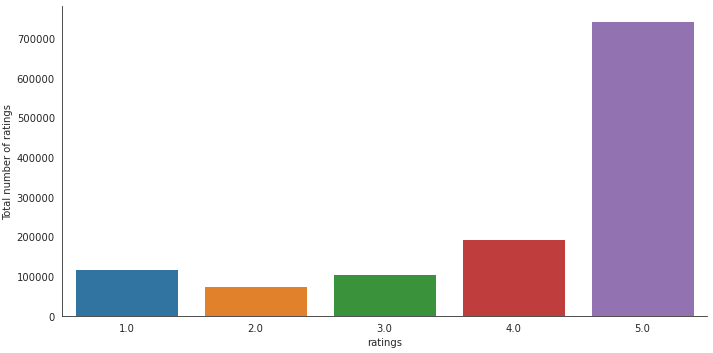

In [20]:
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Here, you can say that more than 50% of the users are giving a rating of 5.

In [24]:
print("Number of unique users:", df['productID'].nunique())
print("Number of unique users:", df['userID'].nunique())

Number of unique users: 103288
Number of unique users: 740985


### Using Groupby to essentially understand the columns in relation

In [42]:
#Check the top 10 users based on ratings
user_ratings=df.groupby('userID').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',user_ratings)

Top 10 users based on ratings: 
 userID
A11FX8HL2ANK6T    199
A3HPCRD9RX351S    185
A1Z54EM24Y40LL    159
A2A9X58G2GTBLP    136
A35R32TA60XD57    130
A175XXVMLQA98A    120
A22CW0ZHY3NJH8    118
A8K5I4MF6QCGJ     116
AS5CX8MSIW8NO     112
A2PN55MTK1BIL5    104
dtype: int64


In [44]:
#Check the bottom 10 users based on ratings
user_ratings_1=df.groupby('userID').size().sort_values(ascending=True)[:30]
print('Top 10 users based on ratings: \n',user_ratings_1)

Top 10 users based on ratings: 
 userID
A00003323X6I53YWRGN0    1
A3BHU01LINAKSY          1
A3BHU4H7BT7C8O          1
A3BHU5SEA9O51B          1
A3BHUD88RGCHDQ          1
A3BHUP8S3UFI48          1
A3BHUQDRRLQA            1
A3BHVCDCP634HN          1
A3BHVKS2OFGFWX          1
A3BHW8MDO4RKQU          1
A3BHWGNQUVMEKU          1
A3BHWI8QIYTF8T          1
A3BHX1MZK2UY2X          1
A3BHX5BXCJJYM7          1
A3BHXBRN1KBR20          1
A3BHXGAXGH4776          1
A3BHT8NK7C27LY          1
A3BHXH5FD0QYYF          1
A3BHSXG7S7FYW1          1
A3BHSK3S3FS88D          1
A3BHN78C46XS7Y          1
A3BHNDYO5BDOCF          1
A3BHOE9PAMQNUT          1
A3BHOUCE57OOUT          1
A3BHPKW36RYN7           1
A3BHPLCIUTI8YY          1
A3BHQ7OZ0KTKAR          1
A3BHQ8FM3BXLD8          1
A3BHQGNXVW5C3A          1
A3BHRT1T62DNQG          1
dtype: int64


In [45]:
#Check the top 10 products based on ratings
product_ratings=df.groupby('productID').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',product_ratings)

Top 10 users based on ratings: 
 productID
B0040QOYZ2    4109
B00008DFGY    3495
B0002DK2DU    3081
B005YRTZWS    2568
B000L3XYZ4    2562
B000OX64P8    2558
B004X6UEH6    2487
B000GFI7UY    2465
B0002I0O60    2347
B000JQALA4    2342
dtype: int64


In [47]:
#Check the bottom 10 products based on ratings
product_ratings_1=df.groupby('productID').size().sort_values(ascending=True)[:10]
print('Top 10 users based on ratings: \n',product_ratings_1)

Top 10 users based on ratings: 
 productID
B00LS8H8I0    1
B006QR9A2K    1
B006QR4SMC    1
B006QOGTMC    1
B001JGAJ2I    1
B006QOGJ36    1
B001JGGKMG    1
B006QOGEI6    1
B006QOFB8K    1
B006QOCFAM    1
dtype: int64


In [49]:
counts=df.userID.value_counts()
df_final=df[df.userID.isin(counts[counts>=25].index)]
print('Number of users who have rated 25 or more items =', len(df_final))
print('Number of unique users in the final data = ', df['userID'].nunique())
print('Number of unique products in the final data = ', df_final['userID'].nunique())




Number of users who have rated 25 or more items = 26776
Number of unique users in the final data =  740985
Number of unique products in the final data =  719


In [50]:
# For now, we will use the 'df_final' data to essentially understand the users that have rated more than 25+ items and to analyse the ratings
final_ratings_matrix = df_final.pivot(index = 'userID', columns ='productID', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1079CQTAUIX6J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AJVTRP6Z3D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)


Shape of final_ratings_matrix:  (719, 13507)


We can see that there are 719 products and 13507 users

In [53]:
#Calucating the density of the rating marix
# Reference: (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.423.4007&rep=rep1&type=pdf)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))




given_num_of_ratings =  26776
possible_num_of_ratings =  9711533
density: 0.28%


In my understanting, the possible number of ratings is higher than the given number of ratings so the matrix is very sparse.

# Splitting the data

In [55]:
#Split the data randomnly into train and test datasets into 70:30 ratio
traindf, testdf = train_test_split(df_final, test_size = 0.3, random_state=0)


In [56]:
traindf.head()

,userID,productID,ratings
461964,A36WGHR8TO5DKT,B0010B6IFY,5.0
838333,A1S8WI296AHOIH,B00414JPT8,5.0
930740,A20F84KUBWM88B,B004YCJQ3C,1.0
39064,AKBXK85W9S71P,B00025694O,5.0
1159462,A32T9TM5F7KHIG,B00B4UR0G2,4.0


In [57]:
testdf.head()

,userID,productID,ratings
640614,A1R377IPZOKLMM,B0026JAKWG,4.0
75739,ADP2GX1QS1IP4,B0002ARWTA,5.0
1164430,A25C2M3QF9G7OQ,B00BFAOW6W,3.0
332124,A2BHX3V65Y4WAC,B000I1R4CS,1.0
969739,A1DH3QDZX8Z7GO,B005D4NX2U,3.0


In [63]:
print("The number of rows and columns for training data is:", traindf.shape[0], "and", traindf.shape[1])
print("The number of rows and columns for testing data is:", testdf.shape[0], "and", testdf.shape[1])


The number of rows and columns for training data is: 18743 and 3
The number of rows and columns for testing data is: 8033 and 3


In [62]:
# Building the Popularity Recommender
# Ref: (https://www.kaggle.com/code/fazilbtopal/popular-recommender-system-algorithms)



The number of rows and columns for testing data is: 8033 and 3


In [66]:
#Count of user_id for each unique product as recommendation score 
train_grouped = traindf.groupby('productID').agg({'userID': 'count'}).reset_index()
train_grouped.rename(columns = {'userID': 'score'},inplace=True)
train_grouped.head(40)

,productID,score
0,0972585419,1
1,1083813210,1
2,4847676011,1
3,9376674824,1
4,979243724X,1
5,9820304687,1
6,B00002N8FK,1
7,B000052YVA,1
8,B0000537O8,1
9,B00005MF9T,3


In [67]:
#Sort the products on recommendation score 
train_sort = train_grouped.sort_values(['score', 'productID'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_sort['rank'] = train_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_sort.head(5) 
popularity_recommendations 

,productID,score,rank
4907,B002CJIPEK,64,1.0
4529,B001VJ0B0I,43,2.0
7251,B004X3VQ5I,41,3.0
1592,B0007A0AQM,38,4.0
2394,B000JQALA4,34,5.0


# Building Recommender Model based on Popularity

In [72]:

def recommend(user_ID):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_ID
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [74]:
find_recom = [10,100,150, 200,250]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

The list of recommendations for the userId: 10

      userID   productID  score  rank
4907      10  B002CJIPEK     64   1.0
4529      10  B001VJ0B0I     43   2.0
7251      10  B004X3VQ5I     41   3.0
1592      10  B0007A0AQM     38   4.0
2394      10  B000JQALA4     34   5.0


The list of recommendations for the userId: 100

      userID   productID  score  rank
4907     100  B002CJIPEK     64   1.0
4529     100  B001VJ0B0I     43   2.0
7251     100  B004X3VQ5I     41   3.0
1592     100  B0007A0AQM     38   4.0
2394     100  B000JQALA4     34   5.0


The list of recommendations for the userId: 150

      userID   productID  score  rank
4907     150  B002CJIPEK     64   1.0
4529     150  B001VJ0B0I     43   2.0
7251     150  B004X3VQ5I     41   3.0
1592     150  B0007A0AQM     38   4.0
2394     150  B000JQALA4     34   5.0


The list of recommendations for the userId: 200

      userID   productID  score  rank
4907     200  B002CJIPEK     64   1.0
4529     200  B001VJ0B0I     43   2.0
7

Since it is a recommender model for most popular products, all the 5 users are given exact recommendations. This only predicts based on the popularity of the products and is not personalised to the buyer's needs or requirements

# Building Recommender Model using Collaborative Filtering

In [76]:
newdf = pd.concat([traindf, testdf]).reset_index()
newdf.head(10)


,index,userID,productID,ratings
0,461964,A36WGHR8TO5DKT,B0010B6IFY,5.0
1,838333,A1S8WI296AHOIH,B00414JPT8,5.0
2,930740,A20F84KUBWM88B,B004YCJQ3C,1.0
3,39064,AKBXK85W9S71P,B00025694O,5.0
4,1159462,A32T9TM5F7KHIG,B00B4UR0G2,4.0
5,179305,ADJ4WY199557G,B000634MHS,5.0
6,747292,A12LH2100CKQO,B003AYL9NU,1.0
7,38085,A1BBCMQSEJN0PP,B0002567D2,5.0
8,1074630,A3P8ZDHC7XSKSE,B007UN1KPY,3.0
9,630791,AVSVOKDI0AGR7,B00203SK0W,3.0


In [77]:
# Bulding a user based collaborative filtering where rows='user' and column=='item'

pivot_df = newdf.pivot(index = 'userID', columns ='productID', values = 'ratings').fillna(0)
pivot_df.head()


productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1079CQTAUIX6J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AJVTRP6Z3D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (719, 13507)


In [79]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6,user_index
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A1079CQTAUIX6J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AJVTRP6Z3D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [80]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()


productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
pivot_df.nunique()
# This is a sparse matrix so SVD can be used.
# Ref: (https://machinelearningmastery.com/using-singular-value-decomposition-to-build-a-recommender-system/)

productID
0972585419    2
1083813210    2
4847676011    2
9376674824    3
979243724X    2
             ..
B00KMHKOZC    3
B00KMHX35A    3
B00KPK9HFY    2
B00KR7WQZI    2
B00KYE5VF6    2
Length: 13507, dtype: int64

# Building Recommender Model using Single Value Decomposition

In [82]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [83]:
print('Left singular matrix: \n',U)


Left singular matrix: 
 [[ 0.01721105 -0.00336789  0.00544498 ... -0.00916999 -0.00540806
  -0.00310043]
 [-0.00463831  0.03224717 -0.00631204 ...  0.03123118  0.02415412
  -0.14865715]
 [-0.00148778 -0.0020774   0.00116781 ... -0.00147281 -0.01428592
  -0.00475782]
 ...
 [ 0.02328731 -0.00300892 -0.00472871 ... -0.0078227  -0.01934728
  -0.0095417 ]
 [ 0.00709162 -0.00319808  0.0045825  ... -0.00746761 -0.01099215
  -0.0051682 ]
 [-0.01400986 -0.01865775 -0.00597456 ...  0.01232336  0.02054915
  -0.08801159]]


In [86]:
print('Sigma: \n',sigma)
sigma.shape

Sigma: 
 [49.5689701  49.78167689 52.67027998 53.2775823  55.09994884 59.02385919
 62.34052756 65.21502655 69.00045136 88.61005951]


(10,)

Sigma is not a diagonal matrix, as it has 10 rows but no columns

In [87]:
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[49.5689701   0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         49.78167689  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         52.67027998  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         53.2775823   0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         55.09994884  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         59.02385919
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  62.34052756  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         65.21502655  0.          0.        ]
 [ 0.          0.          0.        

In [91]:
print('Right singular matrix: \n',Vt)


Right singular matrix: 
 [[ 4.39690198e-04 -1.43482130e-05  1.03952134e-03 ...  1.37449414e-05
   1.94701781e-03  1.26154269e-03]
 [-5.94064490e-05  5.32475400e-05 -7.22466358e-04 ... -1.80940968e-05
  -1.86237005e-03 -1.68770914e-03]
 [-1.65719875e-04 -1.68365517e-04 -2.46568306e-04 ... -8.66351593e-07
   3.93362814e-03  1.90568207e-04]
 ...
 [-3.62818433e-05  1.90727493e-04 -1.31830489e-04 ...  2.33897851e-06
  -5.68493853e-03 -8.26628537e-05]
 [-4.44260034e-04 -6.67536053e-04 -9.28128712e-04 ... -1.34571761e-06
  -2.23773923e-03 -2.75214648e-04]
 [-1.36810698e-04 -1.23941935e-04 -1.94514258e-04 ... -7.94606418e-06
  -1.00040465e-03 -1.60422096e-03]]


In [92]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
0,0.000903,-0.000015,0.001287,0.000714,0.000031,0.000260,0.000522,5.217031e-06,0.001494,0.000037,...,0.000043,0.000043,0.002105,2.418539e-05,0.005959,-0.011914,0.004659,3.443611e-06,0.020293,0.002105
1,-0.000515,0.000677,-0.000489,0.005525,0.000939,0.000334,-0.001045,-1.194307e-05,0.001967,-0.000239,...,-0.000098,-0.000098,0.017103,5.188488e-07,-0.012730,0.309618,-0.001097,1.081117e-04,-0.037539,0.017103
2,0.001368,0.000617,0.001588,0.001108,0.000280,0.000097,0.000295,3.808656e-06,0.012467,-0.000071,...,0.000016,0.000016,0.000745,1.873239e-05,0.002112,-0.001971,0.004225,2.208430e-07,0.009026,0.000745
3,0.000614,0.000474,0.000775,0.000590,0.000160,0.000248,0.000010,4.236151e-07,0.006772,-0.000114,...,-0.000005,-0.000005,0.000858,2.384966e-06,-0.000402,0.000941,0.000873,7.363575e-06,-0.001061,0.000858
4,0.001249,0.004176,0.000062,0.001443,-0.000300,0.000147,0.000167,1.718438e-06,0.003467,0.000052,...,-0.000004,-0.000004,0.003559,4.255387e-05,0.016900,-0.000411,0.000621,-3.216653e-06,-0.000219,0.003559


In [93]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [98]:
userID = 7
num_recommendations = 10
recommend_items(userID, pivot_df, preds_df, num_recommendations)   


Below are the recommended items for user(user_id = 7):

                   user_ratings  user_predictions
Recommended Items                                
B0002DHV16                  0.0          0.361007
B0009X29WK                  0.0          0.319253
B000634MH8                  0.0          0.317845
B001DCAAP4                  0.0          0.311793
B000CMKHDG                  0.0          0.288399
B000IYSAIW                  0.0          0.283991
B0012KB46Q                  0.0          0.272474
B000F9JJJE                  0.0          0.241377
B004X6UEH6                  0.0          0.231611
B0006N9I68                  0.0          0.213026


In [100]:
userID = 3
num_recommendations = 7
recommend_items(userID, pivot_df, preds_df, num_recommendations)   


Below are the recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
B0007A0AQM                  0.0          0.373016
B0002I0O60                  0.0          0.240732
B0002AR0HO                  0.0          0.215503
B003ALMW0M                  0.0          0.214479
B000F4AVPA                  0.0          0.187714
B0006ABVEI                  0.0          0.186744
B003ARUKTG                  0.0          0.182148


In [101]:
userID = 78
num_recommendations = 1
recommend_items(userID, pivot_df, preds_df, num_recommendations)   


Below are the recommended items for user(user_id = 78):

                   user_ratings  user_predictions
Recommended Items                                
B00I18UVO8                  0.0          1.567864


Unlike popularity based recommender system, here you can see that it is user specific so all three have been given different recommendation systems based on users behaviour

# Collaborative Filtering based Recommender Systems

In [103]:
# Actual ratings given by the users
final_ratings_matrix.head()


productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1079CQTAUIX6J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AJVTRP6Z3D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()


productID
0972585419    0.005563
1083813210    0.002782
4847676011    0.006954
9376674824    0.006954
979243724X    0.006954
dtype: float64

In [105]:
# Predicted ratings 
preds_df.head()

productID,0972585419,1083813210,4847676011,9376674824,979243724X,9820304687,9822497490,9828397498,B00002N8FK,B000052YVA,...,B00KB7B8US,B00KC7PXQM,B00KGS7O96,B00KLE8SAY,B00KMBJYIQ,B00KMHKOZC,B00KMHX35A,B00KPK9HFY,B00KR7WQZI,B00KYE5VF6
0,0.000903,-0.000015,0.001287,0.000714,0.000031,0.000260,0.000522,5.217031e-06,0.001494,0.000037,...,0.000043,0.000043,0.002105,2.418539e-05,0.005959,-0.011914,0.004659,3.443611e-06,0.020293,0.002105
1,-0.000515,0.000677,-0.000489,0.005525,0.000939,0.000334,-0.001045,-1.194307e-05,0.001967,-0.000239,...,-0.000098,-0.000098,0.017103,5.188488e-07,-0.012730,0.309618,-0.001097,1.081117e-04,-0.037539,0.017103
2,0.001368,0.000617,0.001588,0.001108,0.000280,0.000097,0.000295,3.808656e-06,0.012467,-0.000071,...,0.000016,0.000016,0.000745,1.873239e-05,0.002112,-0.001971,0.004225,2.208430e-07,0.009026,0.000745
3,0.000614,0.000474,0.000775,0.000590,0.000160,0.000248,0.000010,4.236151e-07,0.006772,-0.000114,...,-0.000005,-0.000005,0.000858,2.384966e-06,-0.000402,0.000941,0.000873,7.363575e-06,-0.001061,0.000858
4,0.001249,0.004176,0.000062,0.001443,-0.000300,0.000147,0.000167,1.718438e-06,0.003467,0.000052,...,-0.000004,-0.000004,0.003559,4.255387e-05,0.016900,-0.000411,0.000621,-3.216653e-06,-0.000219,0.003559


In [106]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productID
0972585419    0.001480
1083813210    0.001218
4847676011    0.001808
9376674824    0.001841
979243724X    0.000539
dtype: float64

In [107]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(13507, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productID,,,
0972585419,0.005563,0.001480,0
1083813210,0.002782,0.001218,1
4847676011,0.006954,0.001808,2
9376674824,0.006954,0.001841,3
979243724X,0.006954,0.000539,4


In [108]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0059 



The RMSE is extremely low so the model is performing better

# Getting top 6 Recommendations 

In [111]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 48
num_recommendations = 6
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 48):

                   user_ratings  user_predictions
Recommended Items                                
B0009X29WK                  0.0          0.265987
B0007A0AQM                  0.0          0.264651
B000JQALA4                  0.0          0.248229
B001DCAAP4                  0.0          0.235350
B000CMKHDG                  0.0          0.224496
B000IYSAIW                  0.0          0.217085


# Conclusion

1. This is my first time building a recommender systems using the amazon ratings data for Pet Products. I chose Pet Products because the customer clientile for those in comparison to Electronics or Fashion is significantly low. This also leads to lesser ratings involved. However, I have tried two types of Recommender Systems

2. The Popularity-based Recommender System not personalised in nature, as seen in the code. A same set of products are being recommended to the customers, as the metric used for popularity is frequency. 

3. The Collaborative-Filtering based model is personalised in nature, it gives us an option to choose how many items we want to be recommended for. It did not recommed the same pet supplies for all the customers. If you are a cat owner, you'll be recommended only cat products based on your purchase history.